# Task 3 (Multiple Linear Regression Model)

## 1) Read the data (petrol_consumption.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import seaborn as sn

In [2]:
df=pd.read_csv("C:/Users/amand/Documents/Excel/petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## 2) Data Preprocessing

In [3]:
min_max= MinMaxScaler()
for column in df.columns:
    if df[column].dtype != 'object':
        df[column]=min_max.fit_transform(df[[column]])
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,0.8,0.222905,0.089044,0.271062,0.315705
1,0.8,0.451514,0.047202,0.443223,0.288462
2,0.8,0.351909,0.066567,0.472527,0.347756
3,0.5,0.792892,0.110656,0.285714,0.112179
4,0.6,0.586222,0.000000,0.340659,0.105769


In [4]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

## 3) Correlation using heatmap

In [5]:
corr_matrix=df.corr()
corr_matrix

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot:>

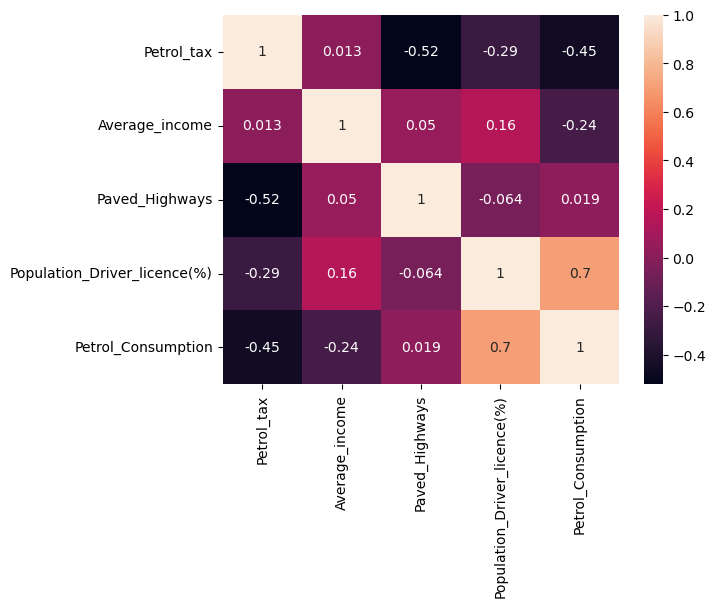

In [6]:
sn.heatmap(corr_matrix,annot=True)

## 4) Splitting dataset



In [7]:
X=df.drop(['Petrol_Consumption'],axis='columns')
Y=df['Petrol_Consumption']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [9]:
x_train.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
27,0.5,0.343572,0.497378,0.468864
33,0.5,0.129004,0.212668,0.351648
2,0.8,0.351909,0.066567,0.472527
17,0.4,0.287407,0.247479,0.326007
36,0.0,0.430891,1.000000,0.421245


## 5)  Train the algorithm

In [10]:
reg1=LinearRegression()
reg1.fit(x_train,y_train)
y_pred_train=reg1.predict(x_train)

In [11]:
reg1.intercept_

0.42562255819694955

In [12]:
reg1.coef_

array([-0.32638504, -0.23521747, -0.06059832,  0.62742972])

In [13]:
y_pred_train

array([0.44565522, 0.43983337, 0.3741834 , 0.41701536, 0.5279731 ,
       0.37402714, 0.49846383, 0.24533021, 0.53952045, 0.13666311,
       0.27676005, 0.47885926, 0.10607466, 0.17153933, 0.65853863,
       0.35172402, 0.17800333, 0.37155807, 0.73273792, 0.30564167,
       0.23776351, 0.39563755, 0.61542207, 0.26338763, 0.3335418 ,
       0.25383548, 0.56517564, 0.55035871, 0.63962069, 0.19077991,
       0.29527148, 0.37806942, 0.50039298])

In [14]:
y_pred_test=reg1.predict(x_test)
y_pred_test

array([ 0.36689005,  0.24848812,  0.49793354,  0.59853583,  0.38859789,
        0.6294505 ,  0.38817056,  0.2550548 ,  0.50554495,  0.34806693,
        0.42698123,  0.28220876,  0.44119925,  0.34943667, -0.04299577])

## 6)  Display actual and predicted values

Text(0.5, 1.0, 'ACTUAL VS PREDICTED')

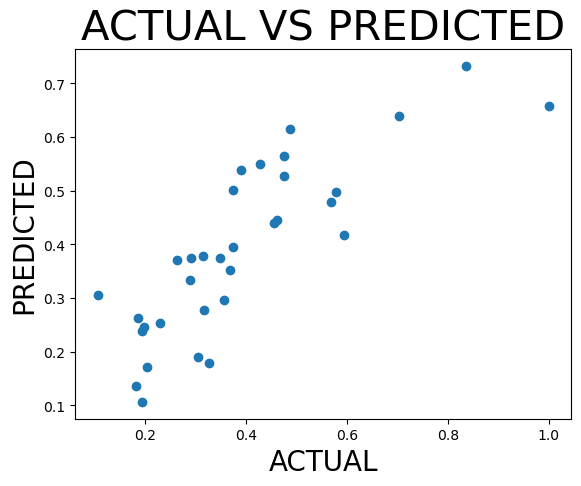

In [15]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("ACTUAL",fontsize=20)
plt.ylabel("PREDICTED",fontsize=20)
plt.title("ACTUAL VS PREDICTED",fontsize=30)

## 7)  Evaluate Algorithm ( Find MSE, MAE, RMSE, R2)

In [16]:
#Evaluation Metrics(TRAINING DATASET)
from sklearn import metrics
#MAE
print("MAE=",metrics.mean_absolute_error(y_train,y_pred_train))
#MSE
print("MSE=",metrics.mean_squared_error(y_train,y_pred_train))
#RMSE
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE= 0.08605817224627553
MSE= 0.011692951282294908
RMSE= 0.10813395064592299


In [17]:
#R Squared
from sklearn.metrics import r2_score
score=r2_score(y_train,y_pred_train)
print('R Square=',score)

R Square= 0.6823942870722377


In [18]:
#Evaluation Metrics(TESTING DATASET)
from sklearn import metrics
#MAE
print("MAE=",metrics.mean_absolute_error(y_test,y_pred_test))
#MSE
print("MSE=",metrics.mean_squared_error(y_test,y_pred_test))
#RMSE
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE= 0.07370615920022008
MSE= 0.007896668279883588
RMSE= 0.08886319980668932


In [19]:
#R Squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print('R Square=',score)

R Square= 0.5578806425569635
